# Polynomial Regression

In [5]:
#Importing Packages
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [2]:
#Download DataSet
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2019-12-04 21:42:24--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70,93K   144KB/s    in 0,5s    

2019-12-04 21:42:25 (144 KB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



## Exploring Data

`FuelConsumption.csv`:
We have downloaded a fuel consumption dataset, **`FuelConsumption.csv`**, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)

- **MODELYEAR** e.g. 2014
- **MAKE** e.g. Acura
- **MODEL** e.g. ILX
- **VEHICLE CLASS** e.g. SUV
- **ENGINE SIZE** e.g. 4.7
- **CYLINDERS** e.g 6
- **TRANSMISSION** e.g. A6
- **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
- **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
- **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
- **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0

In [6]:
df = pd.read_csv("FuelConsumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


Selecionando algumas features para usar na Regressão

In [7]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


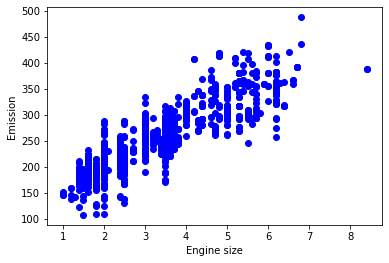

In [8]:
#Plot para averiguar a relação entre os dados
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

Criando um conjunto de teste e um de treino

In [9]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

## Polynomial Regression

Algumas vezes os dados não apresentão uma relação linear, que pode ser interpretada como uma reta, nesses casos é possível tentar prever a tendência dos dados com diferentes tipos de regressões como quadratica, cubica, etc...<br>
Em todo caso pode dizer que uma regressão polinomial ocorre quando a relação entre a variável independente $X$ e a variável dependente $Y$ pode ser modelada com um polinomio de grau n.<br>
Digamos que temos um modelo que aproxima bem nossos dados, e ele é um polinomio de grau 2, teriamos algo como: 
$$y = b + \theta_1  x + \theta_2 x^2$$

Sendo assim, podemos perguntar: Como modelar os dados com esta equação quando temos apenas os valores de $X$, ou seja, de apenas uma feature, digamos __Engine Size?__<br>
R: Teremos que criar features adicionais: $1, x$ e $x^2$
<br><br>
__PolynomialFeatures()__ presente na lib Scikit-learn, fornece novas features para o dataset orginal, ou seja, uma matriz será gerada consistindo de todas as combinações polinomiais das features com grau menor ou igual ao especificado. Por exemplo, digamos que a unica feature no dataset original é a _Engine Size_, agora selecionamos um polinomio do grau 2, então será gerado 3 features: grau = 0, grau = 1 e grau = 2

In [13]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])


poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  1.5 ,  2.25],
       [ 1.  ,  3.5 , 12.25],
       ...,
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.2 , 10.24]])

In [18]:
print("Train_x shape: ",train_x.shape)
print("Train_x_poly shape: ",train_x_poly.shape)

Train_x shape:  (840, 1)
Train_x_poly shape:  (840, 3)


O que a função fit_transform fez foi transformar nossas features (1D) em uma matriz (3D) cuja linha corresponde a um polinomio do grau 2:<br><br>
$
\begin{bmatrix}
    v_1\\
    v_2\\
    \vdots\\
    v_n
\end{bmatrix}
$
$\longrightarrow$
$
\begin{bmatrix}
    [ 1 & v_1 & v_1^2]\\
    [ 1 & v_2 & v_2^2]\\
    \vdots & \vdots & \vdots\\
    [ 1 & v_n & v_n^2]
\end{bmatrix}
$

No nosso exemplo:

$
\begin{bmatrix}
    2.\\
    2.4\\
    1.5\\
    \vdots
\end{bmatrix}
$
$\longrightarrow$
$
\begin{bmatrix}
    [ 1 & 2. & 4.]\\
    [ 1 & 2.4 & 5.76]\\
    [ 1 & 1.5 & 2.25]\\
    \vdots & \vdots & \vdots\\
\end{bmatrix}
$

Desta forma temos algo na forma desejada:
$$y = b + \theta_1  x + \theta_2 x^2$$

__Podemos notar então que a regressão polinomial é um caso especial da tradicional regressão linear multipla, sendo assim pode-se usar os mesmos mecanismos para resolve-la__

### Modelo

In [19]:
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)

# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [[ 0.         48.81216708 -1.27436567]]
Intercept:  [109.41812246]


Text(0, 0.5, 'Emission')

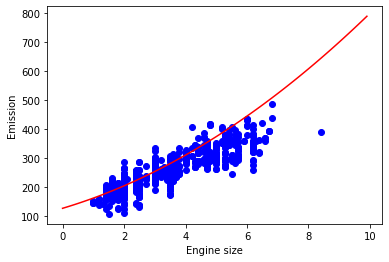

In [32]:
#Plot do fit
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
#Polinomio do 2º
yy = clf.intercept_[0] + clf.coef_[0][1]*XX + clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")

### Evaluation

__Métricas utilizadas__<br>
* Mean Absolute Error: Erro entre duas variavies contínuas, em um gráfico pode ser representado pela distância vertical do ponto a reta. <br><br>
\begin{equation*}
 MAE = \frac{\sum^{n}_{i=1}|y_i - x_i|}{n}
\end{equation*}

* Residual Sum of Squares: Desvios previstos em relação aos valores reais, ou seja, mede a discrepância entre os dados reais e a estimativa do modelo. Para um modelo com uma unica variável a ser prevista: <br><br>
\begin{equation*}
RSS = \sum^{n}_{i=1}(y_i - f(x_i))^2 
\end{equation*}


* R2-Score: Mede o quanto o modelo se ajusta em relação aos valores observados, indicando, em porcentagem, o quanto o modelo consegue explicar os valores observados. <br><br>
Seja a Soma dos quadrados das diferenças entre a média e cada valor observado dado por:
\begin{equation*}
    SQ_{tot} = \sum^{n}_{i=1}(y_i - \bar{y} )^2
\end{equation*}
Além disso, A soma dos quadrados dos resíduos, que calcula a parte que o modelo não explica, dada por:
\begin{equation*}
    SQ_{res} = \sum^{n}_{i=1}(y_i - ŷ_i)^2
\end{equation*}
E a previsão do modelo estimada por:
\begin{equation*}
    SQ_{exp} = \sum^{n}_{i=1}(ŷ_i - \bar{y})^2
\end{equation*}
Onde $\bar{y}$ é a média das observações e $ŷ_i$ é o valor estimado de $y_i$ <br><br>
Podemos reescrever $SQ_{tot}$ como combinação das outras duas e normalizando a equação temos:<br><br>
\begin{equation*}
    SQ_{tot} = SQ_{exp} + SQ_{res} \\
    \frac{SQ_{tot}}{SQ_{tot}} = \frac{SQ_{exp}}{SQ_{tot}} + \frac{SQ_{res}}{SQ_{tot}} \\
    \frac{SQ_{exp}}{SQ_{tot}} = 1 - \frac{SQ_{res}}{SQ_{tot}} \\
    R^2 = 1 - \frac{SQ_{res}}{SQ_{tot}}
\end{equation*}


In [21]:
from sklearn.metrics import r2_score

#Transformando o conjunto de teste da mesma forma que foi feito com o conjunto de treino
test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 23.00
Residual sum of squares (MSE): 876.78
R2-score: 0.72


### Testando uma Regressão Polinomial Cubica

In [22]:
#Criando os conjuntos
train_x_2 = np.asanyarray(train[['ENGINESIZE']])
train_y_2 = np.asanyarray(train[['CO2EMISSIONS']])

test_x_2 = np.asanyarray(test[['ENGINESIZE']])
test_y_2 = np.asanyarray(test[['CO2EMISSIONS']])

In [25]:
#Transformando a variável independente para um polinomio do grau 3
poly_2 = PolynomialFeatures(degree=3)
train_x_poly_2 = poly_2.fit_transform(train_x_2)
train_x_poly_2

array([[ 1.   ,  2.   ,  4.   ,  8.   ],
       [ 1.   ,  1.5  ,  2.25 ,  3.375],
       [ 1.   ,  3.5  , 12.25 , 42.875],
       ...,
       [ 1.   ,  3.   ,  9.   , 27.   ],
       [ 1.   ,  3.2  , 10.24 , 32.768],
       [ 1.   ,  3.2  , 10.24 , 32.768]])

In [26]:
#Criando o modelo
clf = linear_model.LinearRegression()
train_y_2 = clf.fit(train_x_poly_2, train_y_2)

# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [[ 0.         31.6328127   3.55906106 -0.40969578]]
Intercept:  [127.31192938]


Text(0, 0.5, 'Emission')

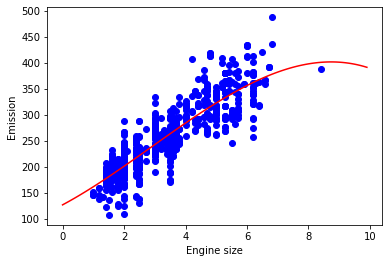

In [31]:
#Plot do fit cubico
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
#Ponilonio do 3º
yy = clf.intercept_[0] + clf.coef_[0][1]*XX + clf.coef_[0][2]*np.power(XX, 2) + clf.coef_[0][3]*np.power(XX, 3)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")

Verificando se a regressão cubica apresenta um melhor resultado

In [33]:
test_x_poly_2 = poly_2.fit_transform(test_x_2)
test_y_ = clf.predict(test_x_poly_2)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y_2)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y_2) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y_2) )

Mean absolute error: 22.89
Residual sum of squares (MSE): 867.38
R2-score: 0.72


# Non Linear Regression Analysis

Se os dados apresentarem um tendência aproximada por uma curva, não mais por uma reta, então uma regressão linear não é o mais apropriado. Nestes casos a relação de não linearidade poderia ser expressa por um polinomio de grau n, por exponenciais, logaritmos, frações, etc...

In [39]:
#Download do DataSet
!wget -nv -O china_gdp.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/china_gdp.csv

2019-12-04 23:29:23 URL:https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/china_gdp.csv [1218/1218] -> "china_gdp.csv" [1]


## Exploration

O dataset consiste do PIB da China de 1960 a 2014, em dólares americanos.

In [19]:
df = pd.read_csv("china_gdp.csv")
df.head(10)

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


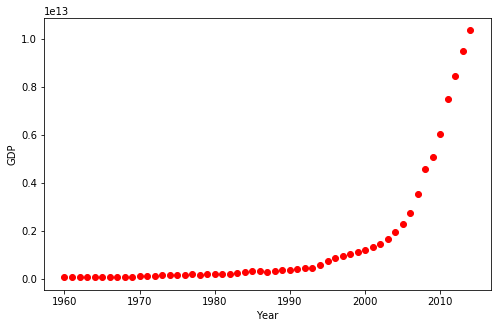

In [20]:
#Ploting the dataset
plt.figure(figsize=(8,5))
x_data, y_data = (df["Year"].values, df["Value"].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

Como podemos ver o grafico apresenta um comportamente explonencial ou de uma função logistica

## Modeling

Para uma primeira aproximação iremos modelar o dataset com uma função logistica.<br>
Sua fórmula é:
$$ \hat{Y} = \frac1{1+e^{\beta_1(X-\beta_2)}}$$
Onde:
* $\beta_1$: Controla a inclinação da curva
* $\beta_2$: "Desliza" a curva pelo eixo x

In [21]:
#Construindo uma função para o modelo
def sigmoid(x, Beta_1, Beta_2):
    y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
    return y

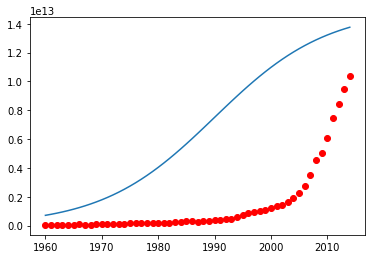

In [22]:
#Coeficientes
beta_1 = 0.10
beta_2 = 1990.0

#Função Logistica
Y_pred = sigmoid(x_data, beta_1 , beta_2)

#Plot da previsão inicial vs conjunto de dados
plt.plot(x_data, Y_pred*15000000000000.)
plt.plot(x_data, y_data, 'ro')

A tarefa agora é encontrar os melhores parametros para o modelo, de modo que a curva da função logistica _fit_ o conjunto de dados.<br>
Vamos normalizar x e y:

In [23]:
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)

Para encontrar os melhores parametros para nosso fiting, podemos usar o __curve_fit__ que utiliza minimos quadrados não lineares para ajustar nossa função aos dados. Tais valores ideais irão minimizar a soma dos resíduos quadrados $(xdata, *popt) - ydata$<br>
__popt__ são nossos parametros otimizados

In [24]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)

#print dos parametros finais
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 690.453017, beta_2 = 0.997207


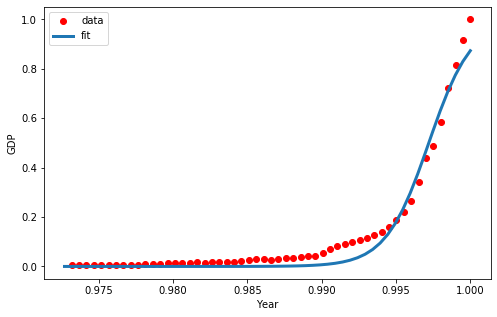

In [25]:
#Plot do resultado com os parametros otimizados
x = np.linspace(1960, 2015, 55)
x = x/max(x)

plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

__Como determinar a acurácia desse modelo?__

In [26]:
#Criando conjuntos de teste e treino
msk = np.random.rand(len(df)) < 0.8

train_x = xdata[msk]
train_y = ydata[msk]

test_x = xdata[~msk]
test_y = ydata[~msk]

In [27]:
#Criando o modelo com o conjunto de treino
popt, pcov = curve_fit(sigmoid, train_x, train_y)

In [28]:
#Usando o conjunto de test para a previsão do modelo
#O *popt faz com que todos os valores do vetor (popt) seja usado
y_hat = sigmoid(test_x, *popt)

In [29]:
#Verificando as métricas do modelo
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))
print()

from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_hat , test_y) )

Mean absolute error: 0.02
Residual sum of squares (MSE): 0.00

R2-score: 0.98


Excelente score! ~98% de precisão, o modelo desenvolvido se aplica bem aos dados

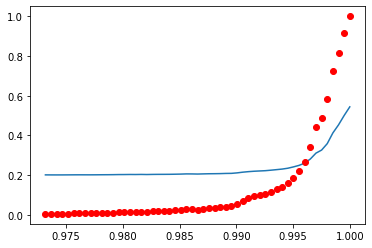

In [204]:
a = .00000000001
b = .2
y_pred =a + b*np.exp(ydata)

plt.plot(xdata, y_pred)
plt.plot(xdata, ydata, 'ro')
plt.show()